<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#ACP" data-toc-modified-id="ACP-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>ACP</a></span></li></ul></div>

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns

from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig

In [20]:
data = pd.read_csv('data/5000_movies_bis.csv')

In [21]:
data.shape

(5043, 28)

In [22]:
col = ['title_year','duration','budget','num_critic_for_reviews','movie_fb_likes','num_voted_users','gross','imdb_score']

In [23]:
data = data[col]

In [24]:
data.shape

(5043, 8)

In [25]:
total = data.isnull().sum().sort_values(ascending=False)

In [26]:
percent = (data.isnull().sum()*100/data.isnull().count()).sort_values(ascending=False)

In [27]:
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Porcentagem'])

In [28]:
missing_data.head(10)

,Total,Porcentagem
gross,466,9.240531
budget,403,7.991275
title_year,108,2.141582
num_critic_for_reviews,50,0.991473
duration,15,0.297442
imdb_score,0,0.000000
num_voted_users,0,0.000000
movie_fb_likes,0,0.000000


In [29]:
data = data.dropna()
print(data.isnull().sum().max())
data.shape

0


(4317, 8)

In [30]:
sum(data['movie_fb_likes'] == 0)

1964

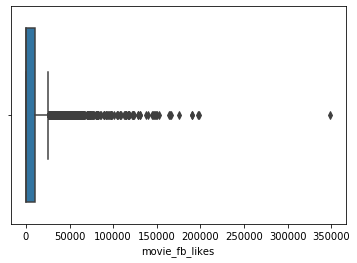

In [32]:
sns.boxplot(x=data['movie_fb_likes'] )

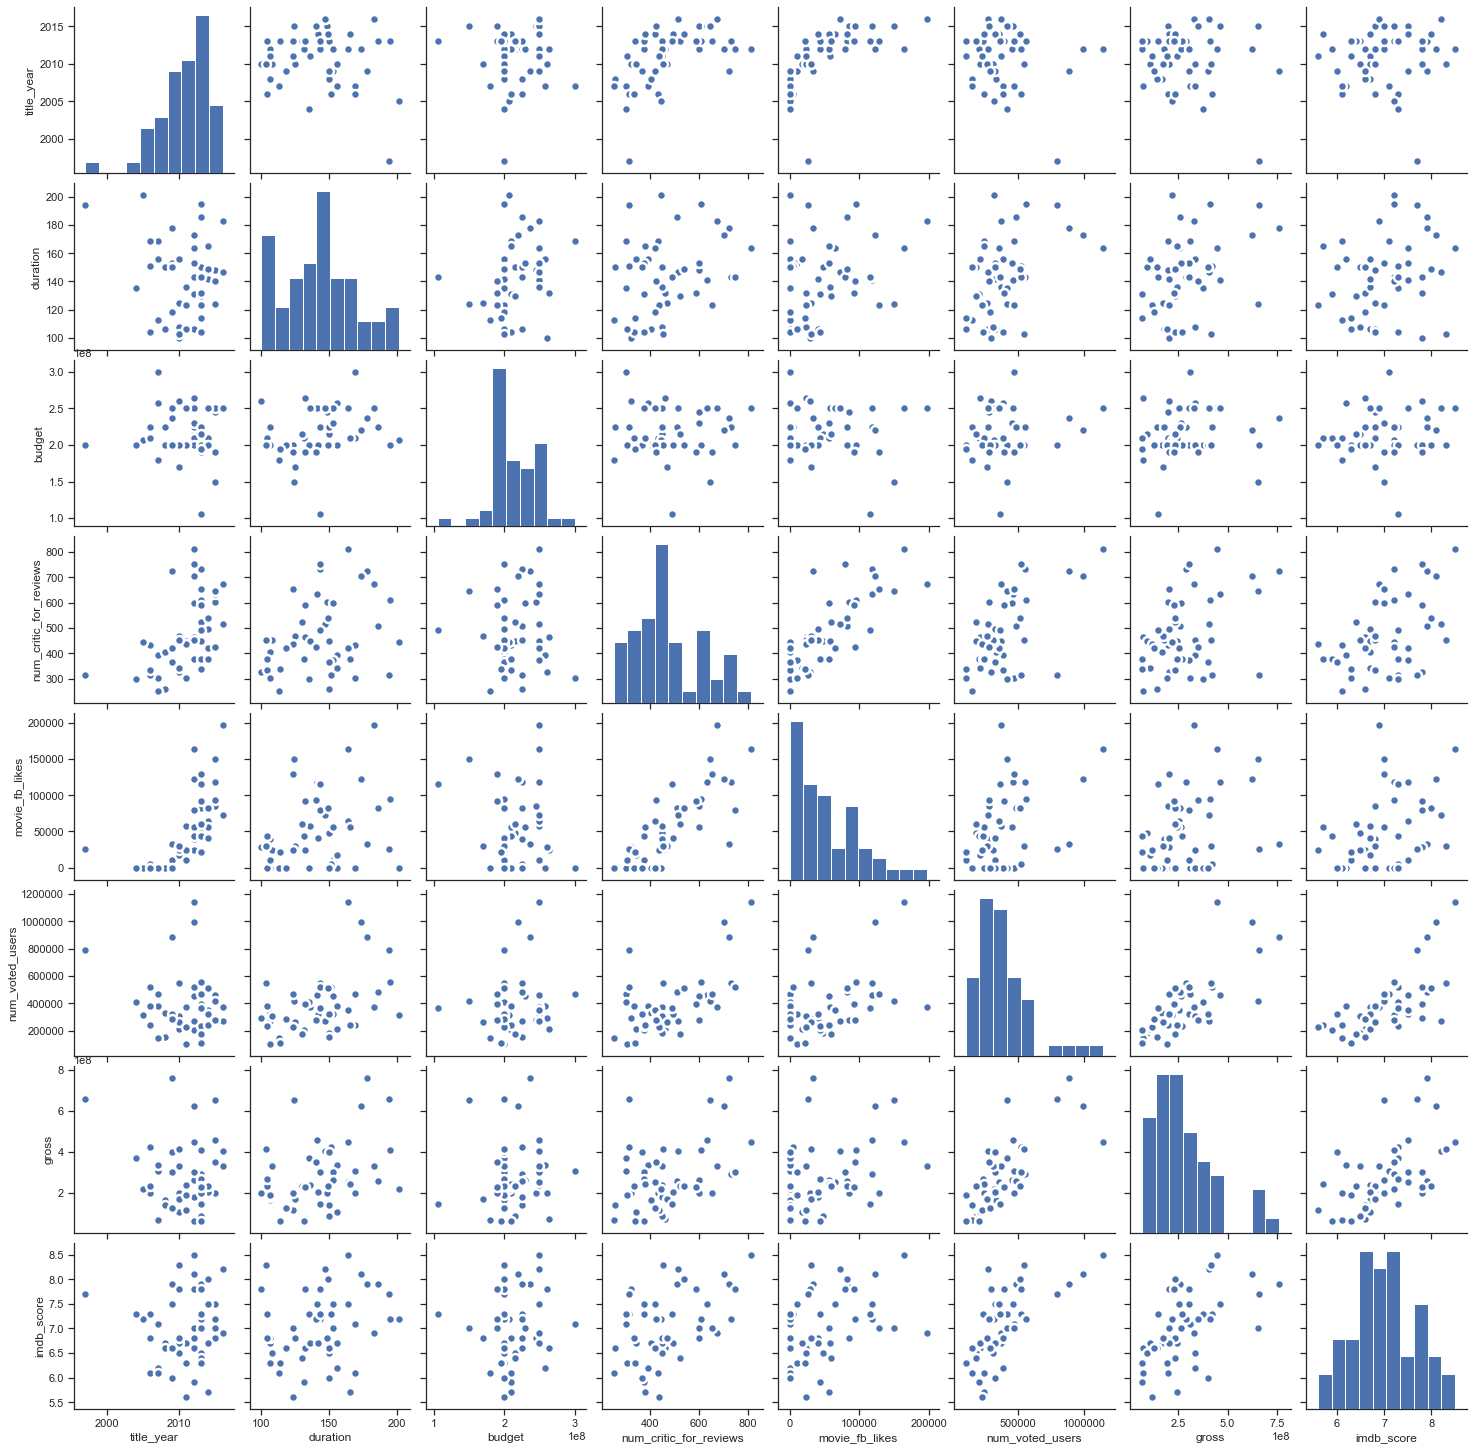

In [33]:
sns.set(style="ticks")
sns.pairplot(data[0:50], kind="scatter", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))

## ACP

In [35]:

A = data
M = mean(A.T, axis=1)
# center columns by subtracting column means
C = A - M
# calculate covariance matrix of centered matrix
V = cov(C.T)

In [36]:
# eigendecomposition of covariance matrix
values, vectors = eig(V)
print(values)

[4.47631678e+16 4.52241313e+15 1.28533129e+10 2.99469473e+08
 6.36171402e+03 4.57218415e+02 9.46800853e+01 7.86540971e-01]


In [37]:
pd.DataFrame(data=[values], columns=[1,2,3,4,5,6,7,8], index=['CP'])

,1,2,3,4,5,6,7,8
CP,4.476317e+16,4.522413e+15,1.285331e+10,2.994695e+08,6361.714015,457.218415,94.680085,0.786541


In [38]:
print(vectors.shape)
print(vectors)

(8, 8)
[[ 2.44165706e-09  8.12074742e-09 -3.97736143e-06 -1.89728610e-04
   4.08728943e-02 -1.03676179e-01 -9.93537514e-01  2.15366997e-02]
 [ 7.89512438e-09  8.25507075e-08  4.59591592e-05 -4.87902287e-05
   1.50284358e-03  9.94544032e-01 -1.03915123e-01 -9.03054441e-03]
 [ 9.99246861e-01 -3.88034829e-02 -3.65336141e-06  1.42442758e-06
  -2.94806315e-08 -4.31098907e-09  1.11925061e-09  4.86807090e-11]
 [ 6.88477692e-08  8.63652028e-07  4.25794417e-04 -3.02267807e-03
   9.99157911e-01  2.73243669e-03  4.07763376e-02 -1.99361615e-03]
 [ 6.11646311e-06  1.14395590e-04  6.89694605e-02 -9.97614099e-01
  -3.05010353e-03 -4.03147494e-05  6.89583854e-05 -9.26163229e-08]
 [ 5.64008257e-05  1.36101030e-03  9.97617743e-01  6.89705280e-02
  -2.15496588e-04 -4.46554714e-05 -2.14281995e-05 -2.68856852e-06]
 [ 3.88034416e-02  9.99245928e-01 -1.36683065e-03  2.03262711e-05
  -2.22484632e-07 -1.84474115e-08  2.68434892e-09  2.72846655e-09]
 [ 1.53696306e-10  3.23850828e-09  4.03923081e-06 -2.28812623e

In [39]:
pd.DataFrame(data=vectors, columns=[1,2,3,4,5,6,7,8], index=[1,2,3,4,5,6,7,8])

,1,2,3,4,5,6,7,8
1,2.441657e-09,8.120747e-09,-0.000004,-0.000190,4.087289e-02,-1.036762e-01,-9.935375e-01,2.153670e-02
2,7.895124e-09,8.255071e-08,0.000046,-0.000049,1.502844e-03,9.945440e-01,-1.039151e-01,-9.030544e-03
3,9.992469e-01,-3.880348e-02,-0.000004,0.000001,-2.948063e-08,-4.310989e-09,1.119251e-09,4.868071e-11
4,6.884777e-08,8.636520e-07,0.000426,-0.003023,9.991579e-01,2.732437e-03,4.077634e-02,-1.993616e-03
5,6.116463e-06,1.143956e-04,0.068969,-0.997614,-3.050104e-03,-4.031475e-05,6.895839e-05,-9.261632e-08
6,5.640083e-05,1.361010e-03,0.997618,0.068971,-2.154966e-04,-4.465547e-05,-2.142820e-05,-2.688569e-06
7,3.880344e-02,9.992459e-01,-0.001367,0.000020,-2.224846e-07,-1.844741e-08,2.684349e-09,2.728467e-09
8,1.536963e-10,3.238508e-09,0.000004,-0.000002,1.125550e-03,1.122265e-02,2.054604e-02,9.997253e-01


In [40]:
values_perc = values*100/sum(values)
pd.DataFrame(data=[values_perc], columns=[1,2,3,4,5,6,7,8], index=['CP %'])

,1,2,3,4,5,6,7,8
CP %,90.82404,9.175933,0.000026,6.076207e-07,1.290786e-11,9.276918e-13,1.921050e-13,1.595884e-15


(8, 4317)


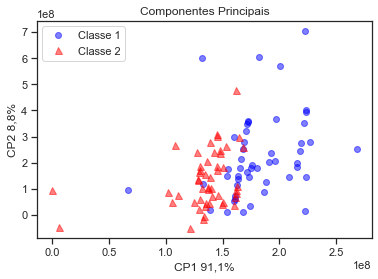

In [41]:
# project data
import matplotlib.pyplot as plt
P = vectors.T.dot(C.T)
print(P.shape)
range = 50
plt.plot(P[0,0:range], P[1,0:range], 'o', markersize=6, color='blue', alpha=0.5, label='Classe 1')
plt.plot(P[0,range:range*2], P[1,range:range*2], '^', markersize=7, color='red', alpha=0.5, label='Classe 2')
plt.xlabel('CP1 91,1%')
plt.ylabel('CP2 8,8%')
plt.legend()
plt.title('Componentes Principais')

plt.show()